# 五線譜

In [57]:
from finlab.data import Data
import pandas as pd
import datetime
data = Data()

days = 750
data.date = datetime.date(2022,10,24)
c = data.get('收盤價')#, 10000000000)

# 計算五條線跟斜率

In [58]:

y = c.iloc[-days:]
x = pd.Series(list(range(days)), index=y.index)
midy = y.mean(axis=0)
midx = days/2

beta = (y - midy).mul(x - midx, axis=0).sum()/((x-midx)**2).sum()
alpha = midy - midx * beta


# 計算中線跟標準差
X = pd.DataFrame({k: x for k in y.columns})
mid_line = ((X * beta + alpha))
std = (y - mid_line).std()


In [59]:
cond = y.iloc[-1] < mid_line.iloc[-1] - 2*std
cond[cond]

stock_id
0050    True
0051    True
0052    True
0053    True
0055    True
        ... 
9918    True
9938    True
9940    True
9941    True
9958    True
Length: 425, dtype: bool

# 畫圖

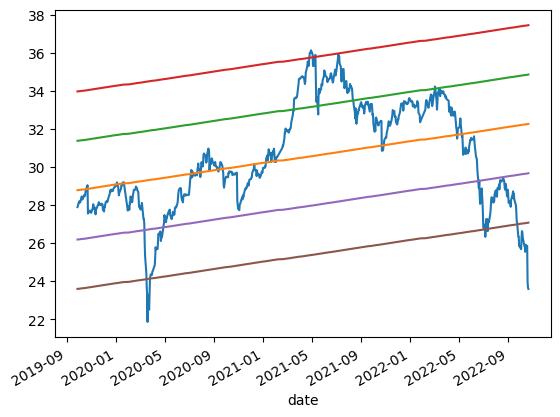

In [60]:
%matplotlib inline

def plot_rainbow(s):
    y[s].plot()

    mid_line[s].plot()

    (mid_line[s] + std[s]).plot()
    (mid_line[s] + 2*std[s]).plot()

    (mid_line[s] - std[s]).plot()
    (mid_line[s] - 2*std[s]).plot()
    
plot_rainbow('0056')

# 選股

In [51]:
# 小於下方一條線的股票
condition = c.iloc[-1] < mid_line.iloc[-1] - 2*std
condition[condition]

stock_id
0050    True
0051    True
0052    True
0053    True
0055    True
        ... 
9918    True
9938    True
9940    True
9941    True
9958    True
Length: 425, dtype: bool

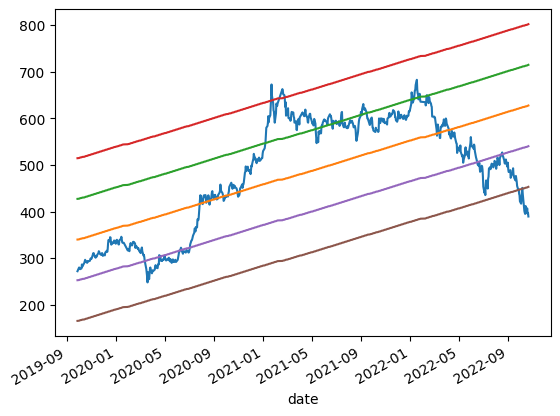

In [61]:
plot_rainbow('2330')

In [55]:
def mystrategy(data):
    
    # 計算 alpha beta (截點跟焦點)
    days = 750
    c = data.get('收盤價', days)
    
    # 請參考 https://zh.wikipedia.org/w/index.php?title=%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8
    # 中的單變量回歸

    y = c.iloc[-days:]
    x = pd.Series(list(range(days)), index=y.index)
    midy = y.mean(axis=0)
    midx = days/2

    beta = (y - midy).mul(x - midx, axis=0).sum()/((x-midx)**2).sum()
    alpha = midy - midx * beta


    # 計算中線跟標準差
    X = pd.DataFrame({k: x for k in beta.index})
    mid_line = ((X * beta + alpha))
    std = (y - mid_line).std()
    
    conditions = [
        (c.iloc[-1] < mid_line.iloc[-1] - 2*std),
        c.iloc[-1] > c.iloc[-20:].mean()    ]
    
    selected_stock = sum(conditions) == len(conditions)
    
    return selected_stock[selected_stock]

In [56]:
from finlab.backtest import backtest
import datetime
start = datetime.date(2008, 1, 1)
end = datetime.date(2022, 1, 1)
data.cache=True
#data = Data()
backtest(start, end, 60, mystrategy, data)

ValueError: Length of passed values is 750, index implies 176.